In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

讀入資料<br/>
MNIST 是有一堆 0-9 的手寫數字圖庫。有 6 萬筆訓練資料, 1 萬筆測試資料。<br/>它是 "Modified" 版的 NIST 數據庫, 原來的版本有更多資料。<br/>這個 Modified 的版本是由 LeCun, Cortes, 及 Burges 等人做的。<br/>可以參考這個數據庫的[原始網頁](http://yann.lecun.com/exdb/mnist/)。
<br/>
    "MNIST 可以說是 Deep Learning 最有名的範例, 它被 Deep Learning 大師 Hinton 稱為「機器學習的果蠅」。"

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train),( x_test, y_test) = mnist.load_data()

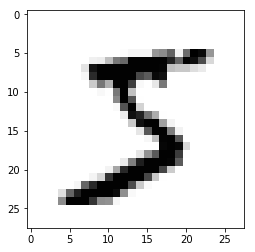

In [4]:
plt.imshow(x_train[0],cmap='Greys')

In [5]:
backup=x_train
interact(lambda x:plt.imshow(backup[int(x)],cmap='Greys'),x=(0,6000))

interactive(children=(IntSlider(value=3000, description='x', max=6000), Output()), _dom_classes=('widget-inter…

<function __main__.<lambda>(x)>

In [6]:
from keras.models import model_from_json
from keras.optimizers import SGD

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [9]:
from keras.utils import np_utils

In [10]:
y_train[0]

5

In [11]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [14]:
model = Sequential()

In [15]:
model.add(Dense(3,input_dim=784)) #第一層有三個
model.add(Activation('selu')) #第一層用selu

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.add(Dense(4,input_dim=784)) #第一層有三個
model.add(Activation('selu')) #第一層用selu

In [17]:
model.add(Dense(5,input_dim=784)) #第一層有三個
model.add(Activation('selu')) #第一層用selu

In [18]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [23]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 2355      
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 16        
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
__________

開始訓練

In [27]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0786 - acc: 0.2708
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0777 - acc: 0.2786
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0774 - acc: 0.2808
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0773 - acc: 0.2803
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0772 - acc: 0.2849
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0770 - acc: 0.2857
Epoch 7/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0773 - acc: 0.2899
Epoch 8/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0769 - acc: 0.2970
Epoch 9/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.0760 - acc: 0.3044
Epoch 10/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0754 - acc: 0.3138

In [28]:
model_json = model.to_json()
open('model_0421_1.json').write(model_json)

FileNotFoundError: [Errno 2] No such file or directory: 'model_0421_1.json'